# Notes # 4
- processing data
- distribution
  : describe how values are distributed for a field
  - shows which values are common and uncommon

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing
- used to prepare dataset to be analyzed
- changing units, normalizing data, removing outlier, removing noise

#### Method:
1. Data Integration
2. Data Transformation
3. Data Reduction
4. Data Augmentation

### Data Integration
- focuses on combing multiple data sources to either get more accurate data or to have more data to process

#### Combining Datasets
- used when there is two sets of data that were record with different features about a subject
- a new copy of the original datasete must be made inorder to add or combine new data
- new data cannot be added to the original data set

##### Example below: how to combine dataset
- will add a fake new feature to the iris data set
- `.copy()` - creates a copy of an existing list
- `np.random.randint()` - returns random integers from the "discrete uniform" distribution of the specified dtype
- `example_iris_df.append(new_samples,ignore_index=True)` - used to combine the dataset
- `ex_iris_df['new_feature'] = new_feature` - used to combine a dataset set
- 

In [30]:
# importing iris flower dataset
iris_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# created a copy of the the iris dataset
ex_iris_df = iris_df.copy()

#creating a separate dataset called new features by generating the random numbers in the numpy array
new_feature = np.random.randint(0,10,size=(iris_df.shape[0]))

# print the columns of the ex_iris_df which is the copy of the original iris numpy datset
print("Copy of the Orignal Dataset:", '\n', ex_iris_df.columns,'\n')

# adding a new column of the data called new features
ex_iris_df['new_feature'] = new_feature
print("New Dataset with a new column added with called new features",'\n',ex_iris_df.columns)

Copy of the Orignal Dataset: 
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object') 

New Dataset with a new column added with called new features 
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'new_feature'],
      dtype='object')


This can also be used to add new samples to a dataset. In this case it could be used to add more samples of each flower to the dataset.

In [31]:
# making a separate copy of the iris dataset
example_iris_df = iris_df.copy()

# making a new sample by extracting the data from the bottom five rows
new_samples = example_iris_df.iloc[-5:]
print("New Sample:", '\n',new_samples, '\n')

print("Added new sample to the copy of the original datset:",'\n')
example_iris_df.append(new_samples,ignore_index=True)

New Sample: 
      sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica 

Added new sample to the copy of the original datset: 



/tmp/ipykernel_15705/933952767.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  example_iris_df.append(new_samples,ignore_index=True)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
150,6.7,3.0,5.2,2.3,virginica
151,6.3,2.5,5.0,1.9,virginica
152,6.5,3.0,5.2,2.0,virginica
153,6.2,3.4,5.4,2.3,virginica


### Data Transformation
- to prepare the data so that it is the right format to be processed
- included changing units, smoothing, aggregating, and normalizing the data

#### Changing Units
- divide values of the dataset the units

##### Example below:
- the data in the iris dataframe is recorded in cm
- to convert the measurement in mm multiply every number by 10

In [32]:
# print the columns of the convert datset (to numpy array). All the columns but the last column (named spieces)
# the purpose fo the leaving out the last column is because the last column data are not values (numbers) therefore it cannot be multiply by 10. 
# There is no units to change
labels = iris_df.columns.to_numpy()[:-1]
print("Labels:",'\n',labels, '\n')

# making a copy of the dataset
example_iris_df = iris_df.copy()

# changing the units of the dataset
# in the copy of the dataset for every label in labels apply (multiplication of the 10)
for i in labels:
  example_iris_df[i] = example_iris_df[i].apply(lambda x: x*10)
print(example_iris_df)

Labels: 
 ['sepal_length' 'sepal_width' 'petal_length' 'petal_width'] 

     sepal_length  sepal_width  petal_length  petal_width    species
0            51.0         35.0          14.0          2.0     setosa
1            49.0         30.0          14.0          2.0     setosa
2            47.0         32.0          13.0          2.0     setosa
3            46.0         31.0          15.0          2.0     setosa
4            50.0         36.0          14.0          2.0     setosa
..            ...          ...           ...          ...        ...
145          67.0         30.0          52.0         23.0  virginica
146          63.0         25.0          50.0         19.0  virginica
147          65.0         30.0          52.0         20.0  virginica
148          62.0         34.0          54.0         23.0  virginica
149          59.0         30.0          51.0         18.0  virginica

[150 rows x 5 columns]


#### Normalizing Data
- normalizing the dataset is the organization of data to appear similiar across all records and fields
- purpose of normalizing a dataset is to minimize the redundancy (duplicate data) and to ensure only related data is stored in each table
- there are multiple methods of the normalizing the data 
 <br>
 
![Normalizing Data](/home/mingye/Documents/PyStudy/Normalizing.png)

##### Example Below:
- applying the four methods to the meterorite data
- `.semilogy()` - amke a plot wil log scaling on the y axis
- `!=` not equal operation in Python. Ex: the `!=` is true, if the values of the two python perands given on each side of the operator are not equal. If they are equal then the code will return false
- `.min()` returns the items with the lowest value
- `max()`returns the items with the highest value

In [33]:
# importing the meterorite date and only looking the mass (g) column
meteorite_df = pd.read_csv('https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv?accessType=DOWNLOAD')
meteorite_mass_df = meteorite_df['mass (g)']

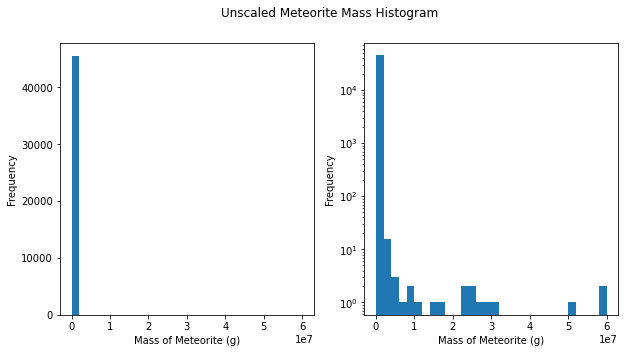

In [34]:
# plotting two graphs 
# with normal axis
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(meteorite_mass_df,bins=30)
ax1.set_xlabel("Mass of Meteorite (g)")
ax1.set_ylabel("Frequency")

# with log axis
ax2.hist(meteorite_mass_df,bins=30)
ax2.set_xlabel("Mass of Meteorite (g)")
ax2.set_ylabel("Frequency")
ax2.semilogy()

fig.suptitle("Unscaled Meteorite Mass Histogram")
plt.show()

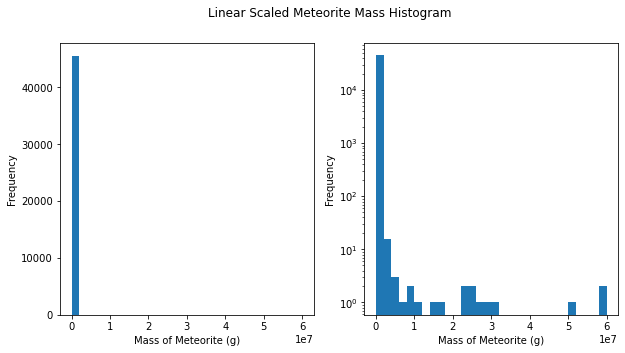

In [35]:

# Some values have a minimum mass of 0, which I am assuming means they don't have an estimate for the minimum size, so I am ignoring those for the minimum.ex_meteorite_mass = meteorite_mass_df.copy()
ex_meteorite_mass = meteorite_mass_df.copy()
min = meteorite_mass_df[meteorite_mass_df!=0].min()
max = meteorite_mass_df.max()
difference = max - min

# normalizing is here
ex_meteorite_mass = ex_meteorite_mass.apply(lambda x:(x-max/difference))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(ex_meteorite_mass,bins=30)
ax1.set_xlabel("Mass of Meteorite (g)")
ax1.set_ylabel("Frequency")

ax2.hist(ex_meteorite_mass,bins=30)
ax2.set_xlabel("Mass of Meteorite (g)")
ax2.set_ylabel("Frequency")
ax2.semilogy()

fig.suptitle("Linear Scaled Meteorite Mass Histogram")
plt.show()

#### Z- Score

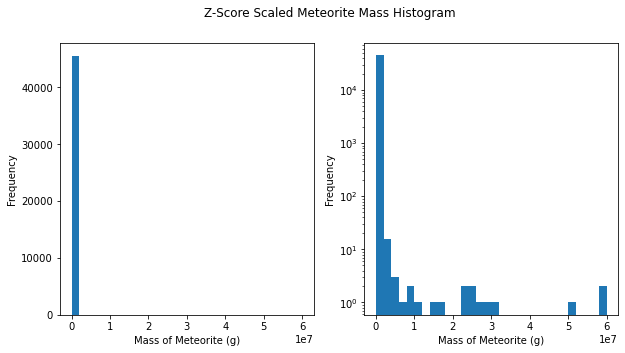

In [36]:
copy_meteorite_mass = meteorite_mass_df.copy()
description = copy_meteorite_mass.describe()

mean = description['mean']
std = description['std']

# normalizing happens here with the applied function
ex_meteorite_mass = ex_meteorite_mass.apply(lambda x: (x-mean/std))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(copy_meteorite_mass,bins=30)
ax1.set_xlabel("Mass of Meteorite (g)")
ax1.set_ylabel("Frequency")

ax2.hist(copy_meteorite_mass,bins=30)
ax2.set_xlabel("Mass of Meteorite (g)")
ax2.set_ylabel("Frequency")
ax2.semilogy()

fig.suptitle("Z-Score Scaled Meteorite Mass Histogram")
plt.show()

This plot has similar results to the linear scaling in that each bin has the same frequency as before, but the range is instead 0 to a little over 100. The true effects of the z-scaling are difficult to see on this dataset because of the huge difference in masses. Lets look at a second example below using the Iris dataset.

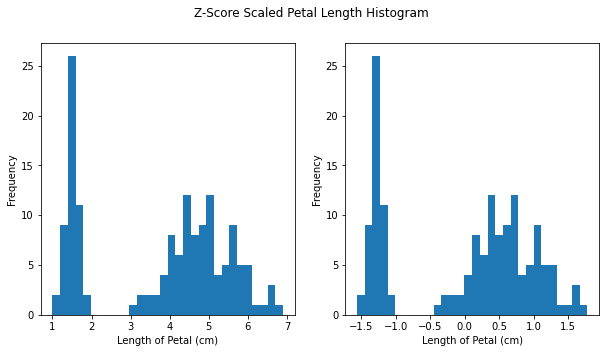

In [37]:
# Making a copy of the iris data set
example_iris_df = iris_df['petal_length'].copy()
description = example_iris_df.describe()

mean = description['mean']
std = description['std']

# normalizing the data here
example_iris_df = example_iris_df.apply(lambda x: (x-mean)/std)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(iris_df['petal_length'],bins=30)
ax1.set_xlabel("Length of Petal (cm)")
ax1.set_ylabel("Frequency")

ax2.hist(example_iris_df,bins=30)
ax2.set_xlabel("Length of Petal (cm)")
ax2.set_ylabel("Frequency")

fig.suptitle("Z-Score Scaled Petal Length Histogram")
plt.show()

In the example above, the Z scaling is more apparent.
- Z scaling is designed to set the variable to equal the number of standard deviations (set the mean to zero)
- all the values below the mean will become negative
- values above will becomes postive
- the farthest a sample is from the mean it 1.5 standard deviation
- compared to the meteorite data, the deviation is 100 above the mean
<br>

Why are there no negative values in the meteorite data:
- masses of meteorite cannot go below zero
- the mean is already very close to 0 compared to the largest sizes
- because of these, the negative values get lumped into the ~0 vlaues

#### Clipping
##### Example below:
- clipping the data to a reasonable values (500), allows for the range of the masses to be greatly shorted
- no samples are lost
- the samples above and below the cutoff are set to the max and min values 

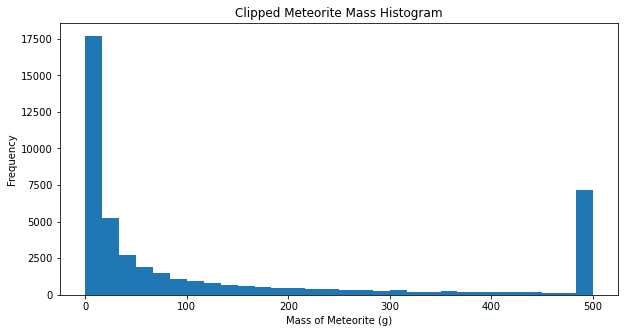

In [38]:
example_meteorite_mass = meteorite_mass_df.copy()

example_meteorite_mass = example_meteorite_mass.clip(lower = 0, upper = 500)

fig, ax = plt.subplots(1,figsize=(10,5))
ax.hist(example_meteorite_mass,bins=30)
ax.set_xlabel("Mass of Meteorite (g)")
ax.set_ylabel("Frequency")
ax.set_title("Clipped Meteorite Mass Histogram")
plt.show()

#### Log
- different from using a logarithmic axis for the data
- in the example below, the masses will be brought closer together using the log function before separating it into bins
- in this case, there is no need to modify the plot axis
- `==` used to measure the equality of two objects. It will return true if the objects are equal. If the objects are not equal the function will return false

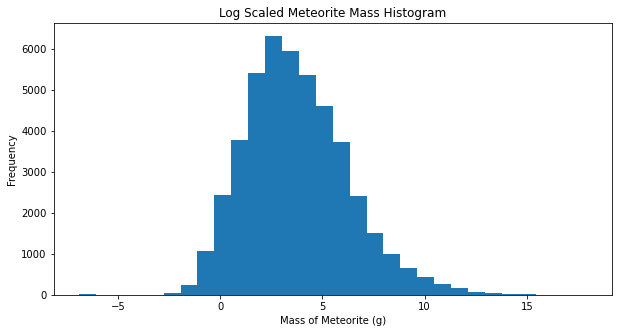

In [39]:
example_meteorite_mass = meteorite_mass_df.copy()

#if the copy of the meteorite data is equal to zero then it is equal to .001
example_meteorite_mass[example_meteorite_mass == 0] = .001

# normalizing happens here
example_meteorite_mass = example_meteorite_mass.apply(lambda x: np.log(x))

fig, ax = plt.subplots(1,figsize=(10,5))
ax.hist(example_meteorite_mass,bins=30)
ax.set_xlabel("Mass of Meteorite (g)")
ax.set_ylabel("Frequency")
ax.set_title("Log Scaled Meteorite Mass Histogram")
plt.show()

#### Smoothing Data
- term for methods that create an approximation function that attempts keep important parts fo the data while rejecting noise and outliers
- Times Series Data
- Images

#### Times Series Data
- any data where the index of the sample represents the order the samples were recorded.
- Ex: recording of a song, recording the output of a gyroscope, recording the temperature over the course of a year
- there are many reasons to use data smoothign with times series data
  1. Data Smoothing to remove noise
   - there is ofthen background noise that is accidently recorded like recordinf of a concert
  2. Data smoothing to Handle Old Data
   - reduce the effect of the old data when trying the predict future values
   - Ex: you want to predict the cost of homes in San Antonio and found a database containing home prices from the last 75 years. The data would be good to show trends in the market over time, but majority of it would not be relevent to the cost of homes

##### Example Below: Data Smoothing to Remove Noise
- First, plotting the a sin wave, then add noise to the sin wave, then practicing how to remove it
- `len()` return the number of items in an object
- `np.random.standard_normal()`- get the random samples from the standard normal distrubtion and return the random samples as numpy array

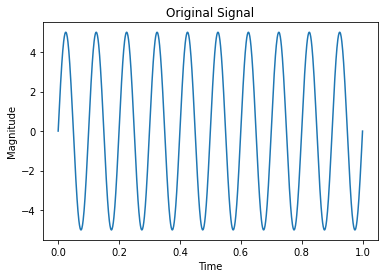

In [40]:
frequency = 10
sampling_rate = 1000
amplitude = 5
t = np.linspace(0,1,sampling_rate) # This is creating the point we will sample from our signal

# math function desired_sound = 5*sin(2pi*10t)
desired_sound = lambda t: amplitude*np.sin(2*np.pi*frequency*t) # Our sound is represented by a sin wave
sampled_signal = desired_sound(t)

fig,ax = plt.subplots(1)
ax.plot(t,sampled_signal)
ax.set_xlabel("Time")
ax.set_ylabel("Magnitude")
ax.set_title("Original Signal")
plt.show()

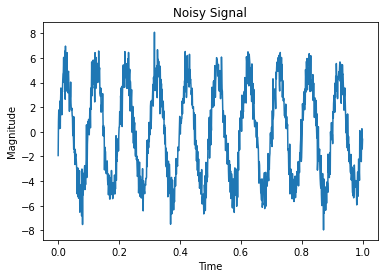

In [41]:
# adding Noise to it
noise = np.random.standard_normal(len(t))
noisy_signal = np.add(sampled_signal,noise)

fig,ax = plt.subplots(1)
ax.plot(t,noisy_signal)
ax.set_xlabel("Time")
ax.set_ylabel("Magnitude")
ax.set_title("Noisy Signal")
plt.show()

#### Times Series Data Smoothing
- adding 'white noise' to the signal meaning the normal distribution with mean = 0 and standard deviation = 1
- When working with signals such as sound, the function that is applied to the signal is called a filter. We will apply a filter to the time series data that will remove the white noise.
- Butterworth filter
  : is a type of signal processing filter designed to have a frequency response that is as flast as possible
- `scipy.signal.butter(N, Wn,btype, analog, output)` butter worth digital and analog filter design
  - N - order of the fitler
  - Wn - array like
  - bytpe - the type of filter. Default it lowpass
  - Analog - when true, return an analog filter, otherwise a digital filter is returned
  - output - type of output. `sos` means second -ordere sections
- `scipy.signal.sosfilt()` - filter data along one dimension using cascaded second order section ??

##### Example Below:
- using scipy to design a butterworth filter (using it to create low pass filter)
- Low filters allows for lower frequencies to pass while supressing higher frequenciesLow pass
- Note that this is why the filter is a data smoothing method, we are supressing values we dont want (noise) and keeping values we want.
- applying the filter `signal.sosfilt` will returned a filtered signal

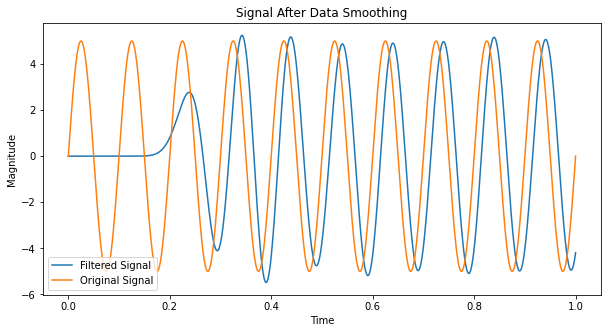

In [42]:
import scipy.fft as fft
from scipy import signal

sos = signal.butter(30, frequency+5, 'lp', fs=sampling_rate, output='sos')
filtered_signal = signal.sosfilt(sos, noisy_signal)


fig,ax = plt.subplots(1,figsize=(10,5))
ax.plot(t,filtered_signal, label = 'Filtered Signal')
ax.plot(t,sampled_signal, label = 'Original Signal')
ax.set_xlabel("Time")
ax.set_ylabel("Magnitude")
ax.set_title("Signal After Data Smoothing")
ax.legend()
plt.show()

#### Data Smoothing to Handle
- Another use of data smoothing is to reduce the effects of old relevant data, which will predict accurate future values

##### Example below:
-  create a sin wave, which represents a stream of data that is being recorded. 
-  apply a exponential function to the sin wave to reduce the effect of older sample

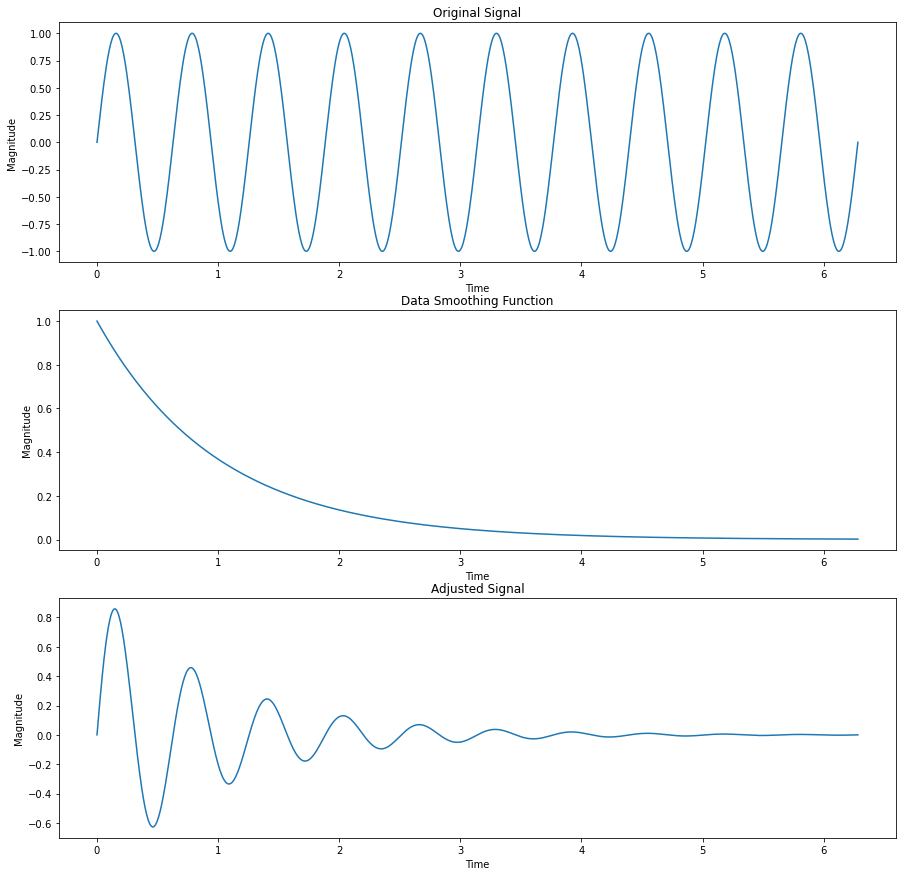

In [43]:
t = np.linspace(0,2*np.pi,1000)
signal = np.sin(10*t)

exponential_data_smoothing = np.exp(-t)

adjusted_signal = np.multiply(signal,exponential_data_smoothing)

fig,(ax1,ax2,ax3) = plt.subplots(3,figsize=(15,15))
ax1.plot(t,signal)
ax1.set_xlabel("Time")
ax1.set_ylabel("Magnitude")
ax1.set_title("Original Signal")

ax2.plot(t,exponential_data_smoothing)
ax2.set_xlabel("Time")
ax2.set_ylabel("Magnitude")
ax2.set_title("Data Smoothing Function")

ax3.plot(t,adjusted_signal)
ax3.set_xlabel("Time")
ax3.set_ylabel("Magnitude")
ax3.set_title("Adjusted Signal")
plt.show()

#### Images
- Data Smoothing can be used to modify images
- most commonly use of this is to remove noise from the data
- done by averaging the values of a pixel with its neighbor. The effect of reducing the pixel values. 

In [44]:
import sklearn.datasets as datasets
from skimage.util import random_noise
from skimage import filters
from scipy import ndimage as ndi

##### Example below:
- `ax.show()`display data as an image
- `datasets.load_sample_image()` load sample image for  manipulation

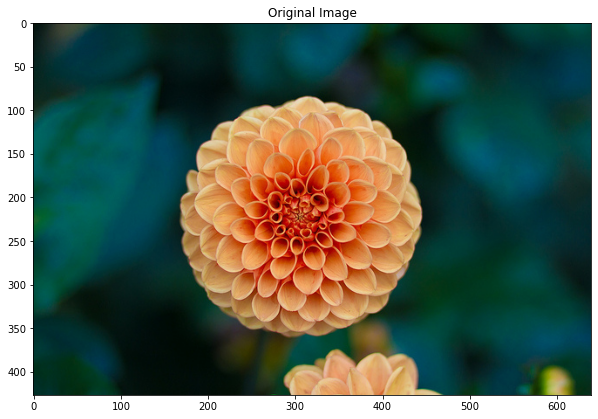

In [45]:
image = datasets.load_sample_image('flower.jpg')

fig,ax = plt.subplots(1,figsize=(10,10))
ax.imshow(image)
ax.set_title("Original Image")
plt.show()


- `random_noise`- adds random noise of various types to a floating point image

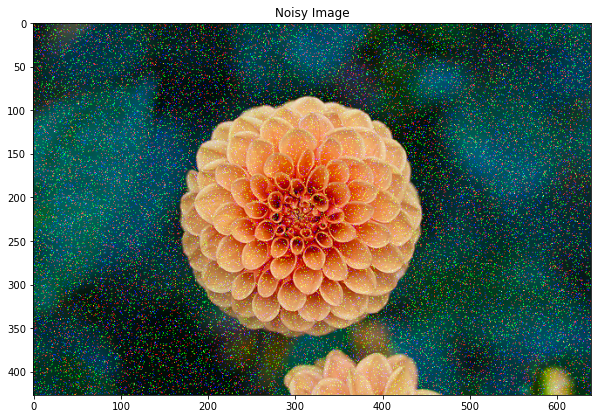

In [46]:
# adding noise to the image

noisy_image = random_noise(image,mode='salt')

fig,ax = plt.subplots(1,figsize=(10,10))
ax.imshow(noisy_image)
ax.set_title("Noisy Image")
plt.show()

/home/mingye/anaconda3/lib/python3.9/site-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


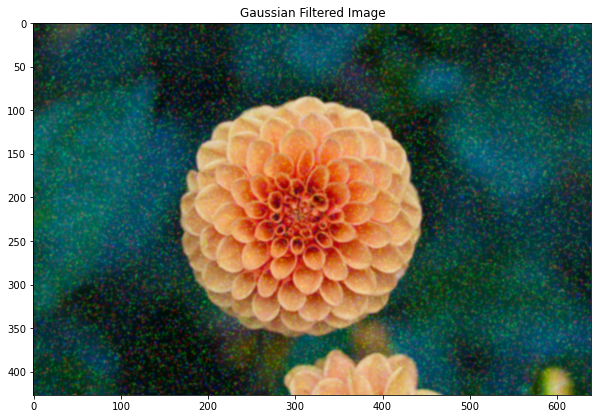

In [47]:
# changing the standard deviaton of the filter will affect the blurrness of the image
gaussian_std = 1

# applies Gaussian filter
filtered_image = filters.gaussian(noisy_image,gaussian_std) # The 1 adjusts the standard deviation of the gaussian, which effects how large it is. (The higher the standard deviation, the wider it is)

fig,ax = plt.subplots(1,figsize=(10,10))
ax.imshow(filtered_image)
ax.set_title("Gaussian Filtered Image")
plt.show()

### Data Reduction 
- the process of the reducing the size of the dataset
  - Ways to do it:
  - 1. Dimensionality Reduction
  - 2. Downsampling
  - 3. Clustering
- purpose fo the reducing the data is to make the dataset more manageable and easy to analyze

#### Dimensionality Reducion
- the process of reducing the number of features in a dataset in oder to reduce its size
- removing or combining two features

#### Combining Features
- to reduce the number of features while still retaining the most information possible
- method: PCA (Principal Component Analysis)

#### PCA (Principal Component Analysis)
- it is a linear dimensionality reduction techniqu
- PCA initially keeps the same amount of features as it started with, shown by the shape of the dataset before and after it is applied. 
- While the data is the same shape as before, the actual sampes have been changed
- the actual samples have been rotated so they are as flat as possible
- `dataset.load_iris()` load iris
- `.fit()` estimates the best representative function for the data points
- `transform()` used to call function on self producing a series with transformed values and that has the same axis length as self
- `np.random.uniform(low value, high value, size)` draw samples from a uniform distribution
- `len()` returns the number of items in an object

In [48]:
from sklearn.decomposition import PCA
from sklearn import datasets

In [49]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [50]:
# applying the PCA to the Iris Dataset
print("Dataset shape before PCA:",X.shape)
pca = PCA()

pca.fit(X)
X = pca.transform(X)
print("Dataset shape after PCA:",X.shape)

Dataset shape before PCA: (150, 4)
Dataset shape after PCA: (150, 4)


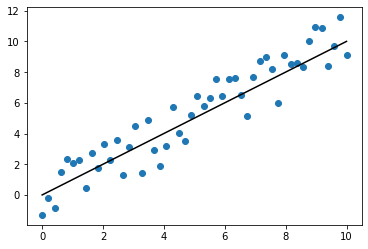

In [51]:
x = np.linspace(0,10,50)

# pulling samples from a normal distribution
y1 = x + np.random.uniform(-2,2,size = len(x))
y2 = x

fig,ax = plt.subplots(1)
ax.scatter(x,y1)
ax.plot(x,y2,color='k')
plt.show()

- the scatter points are the samples
- black line is the would be new axis that PCA created
- if the entire image were to be rotated so that the black line would be flat, the result would be the new values for samples using PCA
- In order to complete the dimensionally reduction, the Explained Variance Ratio must be looked at. 
- Explained Variance Ratio tells you how much data from the original dataset is stored in each feature

##### Example Below
- print the Explained Variance Ratio
- according to what is print, 92.45% of the info are from the dataset
- the next best is 5.3%
- based on these percentages, we can remove teh last 3 features and still maintain nearly all the information
- Using PCA, we have successfully reduced the Iris dataset from 4 features to 2
- Some Dataset are very big have contained many samples, therefore Dimensionality Reduction is very useful in these cases
- It is typically useful to normalize your features before you apply PA

In [52]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.92461872 0.05306648 0.01710261 0.00521218]


### Data Augmentation
- increase the size of a dataset by adding slightly modified data to your dataset
- the new data will be treated as a completely new imput by the computer
- This is the valid method for increasing the size of a dataset

#### Image Data Augmenetation
- there are many ways to augment image data
- the Python Image Library, popular library for handling images in Python

##### Example Below
- `Image0ps` - module contains a number of 'ready made' image processing operation
- `scikit-learn` - library for machine learning in Python
- `sklearn.datasets` - package embeds some small toy datasets
- `Image.fromarray()`function used to save a numpy Array as a image
  <br>
- `Image0ps.mirror()` to flip the image left or right (horizontally)
- `Image0ps.filp()` flip images vertically upside down
- `rotate()` to rotate image with a specified amount of degrees
- `Image0ps.scale()`
- `.resize()`
- `.delaxes()`used to removev the Axes as from the figue and update the current axes

In [56]:
from PIL import Image, ImageOps
import sklearn.datasets as datasets

# loading the a flower image from the dataset and turning it into an array
image = datasets.load_sample_image('flower.jpg')
image = Image.fromarray(image)

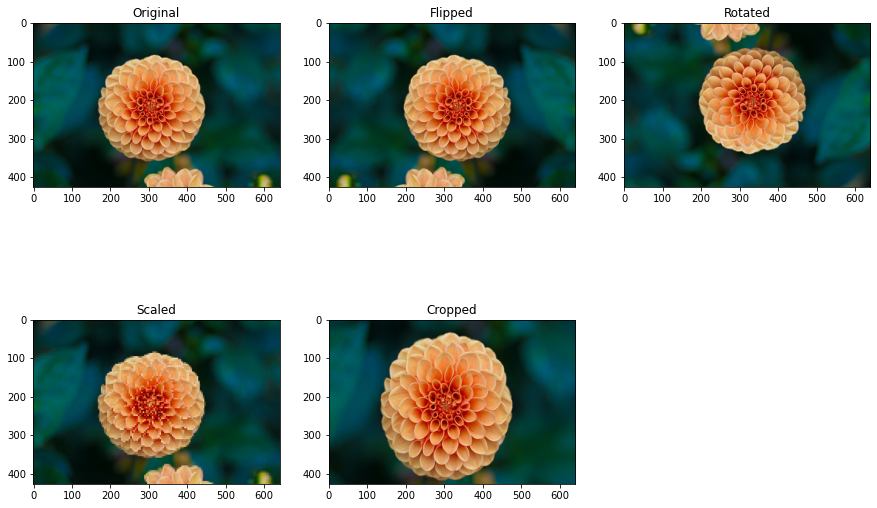

In [57]:
flipped_image = ImageOps.mirror(image)
rotated_image = image.rotate(180)
scaled_image = (ImageOps.scale(image, .25, resample = Image.NEAREST)).resize(image.size,resample=0)
cropped_image = ImageOps.crop(image, 60).resize(image.size)


fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize = (15,10))
ax1.imshow(image)
ax1.set_title("Original")

ax2.imshow(flipped_image)
ax2.set_title("Flipped")

ax3.imshow(rotated_image)
ax3.set_title("Rotated")

ax4.imshow(scaled_image)
ax4.set_title("Scaled")

ax5.imshow(cropped_image)
ax5.set_title("Cropped")

fig.delaxes(ax6)
plt.show()

#### Synthetic Data Generation
- Synthetic data augmentation is the process of creating new data based on statistics of the original data set

##### Example below:
- create a dataset with two variables and generate the new data
- will match a distribution to each features
- if the distributions are a good match, then we will be anle to sample them to create new data similiar to the original
- rayliegh distribution is used for calculating the circular error probable 
- `rayleigh(scale, size)`- get the random samples from reyleigh distribution and return the random samples
  - scale - flaot or arraylike of floats
  - size - int tuple of ints
- `stats.norm.rvs()` - returns random variables
- conlusion: As you can see, the new synthetic samples could not be separated from the original samples. This data could then be added to the original dataset and used for data analysis.

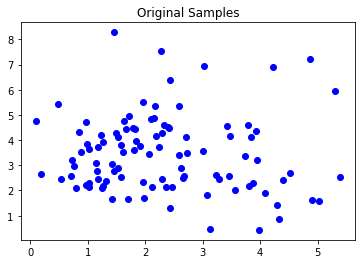

In [58]:
# making a dataset of samples
x = np.random.rayleigh(2,size = (100,1))
y = np.random.rayleigh(3,size = (100,1))

# plotting a scatter plot
fig,ax = plt.subplots(1)
ax.scatter(x,y,color='b')
ax.set_title("Original Samples")
plt.show()

In [60]:
import scipy.stats as stats

# what is fit?
# why we need to fit

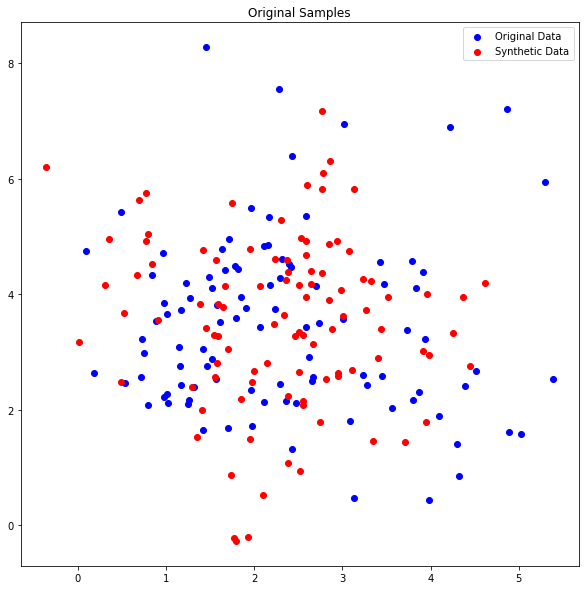

In [61]:
# x = np.random.rayleigh(2,size = (100,1))
# y = np.random.rayleigh(3,size = (100,1))

stats_x = stats.describe(x)
stats_y = stats.describe(y)

# `stats.fit()` - fit a discrete or continuous distribution to data
x_params = stats.norm.fit(x)
y_params = stats.norm.fit(y)

# the argument scale denotes standard deviation???
synth_x = stats.norm.rvs(*x_params, size = 100)
synth_y = stats.norm.rvs(*y_params, size = 100)

fig,ax = plt.subplots(1,figsize = (10,10))
ax.scatter(x,y,color='b', label = "Original Data")
ax.scatter(synth_x,synth_y,color='r', label = "Synthetic Data")
ax.set_title("Original Samples")
ax.legend()
plt.show()